In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from more_itertools import pairwise

In [22]:
file_path = '../data/CSSE-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [23]:
df_raw = pd.read_csv(file_path)

In [24]:
df = df_raw.groupby('Country/Region').sum().iloc[:,2:]

In [25]:
df_diff = pd.DataFrame()
for p1, p2 in pairwise(df.columns):
    df_diff[p2] = df[p2] - df[p1]

In [26]:
df_diff

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,63,55,23,81,41,62,94,70,76,125
Albania,0,0,0,0,0,0,0,0,0,0,...,349,336,341,348,264,141,256,317,286,360
Algeria,0,0,0,0,0,0,0,0,0,0,...,112,125,95,98,117,140,125,112,135,127
Andorra,0,0,0,0,0,0,0,0,0,0,...,43,62,59,57,55,42,35,46,47,41
Angola,0,0,0,0,0,0,0,0,0,0,...,88,68,112,52,86,168,125,98,134,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,2,0,0,0,0,0,0,0,0,4,...,14,3,6,5,6,11,11,9,15,9
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,2292,2248,1589,2806,2634,2539,2672,2884,2378,1502
Yemen,0,0,0,0,0,0,0,0,0,0,...,174,89,77,101,83,94,72,86,100,43


In [34]:
window = 7
df_rolling = pd.DataFrame()
for country, r in df_diff.iterrows():
    df_rolling[country] = r.rolling(window=window).mean()

In [35]:
df_rolling

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/23/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/25/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/26/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/27/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/6/21,56.428571,316.142857,116.857143,54.857143,100.428571,5.285714,13609.142857,911.714286,10.714286,2909.285714,...,3309.428571,2943.142857,179.000000,0.0,1417.857143,7.714286,2342.285714,104.000000,124.571429,18.142857
4/7/21,59.857143,290.714286,116.000000,50.428571,99.857143,5.857143,14463.857143,894.142857,9.000000,2825.571429,...,3121.142857,3062.571429,179.714286,0.0,1384.571429,8.000000,2397.142857,98.571429,138.285714,14.571429
4/8/21,60.857143,286.142857,116.000000,50.857143,101.285714,4.714286,15785.714286,913.285714,8.142857,2760.285714,...,2915.285714,3209.857143,181.714286,0.0,1374.571429,7.285714,2481.714286,86.000000,149.000000,22.285714
4/9/21,63.857143,279.000000,117.428571,48.714286,110.714286,4.285714,17818.285714,900.857143,7.857143,2698.142857,...,1742.571429,3768.285714,184.285714,0.0,1390.142857,9.000000,2500.285714,87.571429,150.428571,34.857143


<AxesSubplot:>

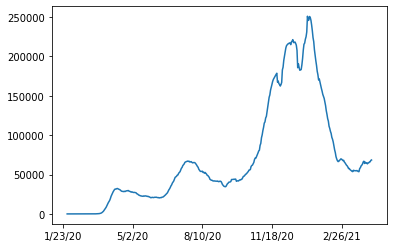

In [37]:
df_rolling['US'].plot.line()

<AxesSubplot:>

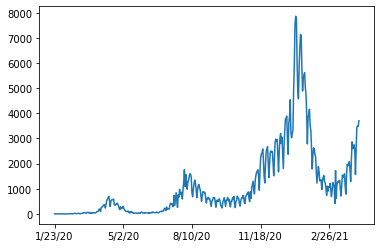

In [28]:
df_diff.T['Japan'].plot.line()

<AxesSubplot:>

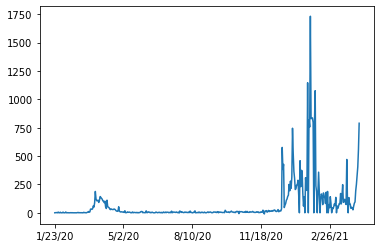

In [29]:
df_diff.T['Thailand'].plot.line()

In [15]:
df.columns.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',